# Recommender System: Collaborative filtering on Entree restaurant dataset

### Notebook Contents:

#### -  User-based (user-user) collaborative filtering 
    
#### - Item-based (item-item) collaborative filtering 
    
#### - Evaluation
    
#### - Conclusion

## User-based collaborative filtering

### Loading libraries and files

In [ ]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ratings = pd.read_csv('/content/gdrive/My Drive/session2.csv')


#### High-level info of data

In [ ]:
#converted ratings as follows 1 for critique, 2 for browse, 4 for endpoint, 5 for startingpoint on a 5 point scale. All users with fewer than 10 ratings were removed.

In [ ]:
ratings.head()

,UserID,NumberOfRatings,000000C,000001C,000002C,000003C,000004C,000005C,000006C,000007C,000008C,000009C,0000010C,0000011C,0000012C,0000013C,0000014C,0000015C,0000016C,0000017C,0000018C,0000019C,0000020C,0000021C,0000022C,0000023C,0000024C,0000025C,0000026C,0000027C,0000028C,0000029C,0000030C,0000031C,0000032C,0000033C,0000034C,0000035C,0000036C,0000037C,...,00000636C,00000637C,00000638C,00000639C,00000640C,00000641C,00000642C,00000643C,00000644C,00000645C,00000646C,00000647C,00000648C,00000649C,00000650C,00000651C,00000652C,00000653C,00000654C,00000655C,00000656C,00000657C,00000658C,00000659C,00000660C,00000661C,00000662C,00000663C,00000664C,00000665C,00000666C,00000667C,00000668C,00000669C,00000670C,00000671C,00000672C,00000673C,00000674C,00000675C
0,12375,47,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,10376,43,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,20416,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12728,30,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49211,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.tail()

,UserID,NumberOfRatings,000000C,000001C,000002C,000003C,000004C,000005C,000006C,000007C,000008C,000009C,0000010C,0000011C,0000012C,0000013C,0000014C,0000015C,0000016C,0000017C,0000018C,0000019C,0000020C,0000021C,0000022C,0000023C,0000024C,0000025C,0000026C,0000027C,0000028C,0000029C,0000030C,0000031C,0000032C,0000033C,0000034C,0000035C,0000036C,0000037C,...,00000636C,00000637C,00000638C,00000639C,00000640C,00000641C,00000642C,00000643C,00000644C,00000645C,00000646C,00000647C,00000648C,00000649C,00000650C,00000651C,00000652C,00000653C,00000654C,00000655C,00000656C,00000657C,00000658C,00000659C,00000660C,00000661C,00000662C,00000663C,00000664C,00000665C,00000666C,00000667C,00000668C,00000669C,00000670C,00000671C,00000672C,00000673C,00000674C,00000675C
3587,50432,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3588,50449,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3589,50515,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3590,50523,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3591,50562,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.shape

(3592, 678)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 678 entries, UserID to 00000675C
dtypes: float64(676), int64(2)
memory usage: 18.6 MB


In [ ]:
ratings.dtypes

UserID               int64
NumberOfRatings      int64
000000C            float64
000001C            float64
000002C            float64
                    ...   
00000671C          float64
00000672C          float64
00000673C          float64
00000674C          float64
00000675C          float64
Length: 678, dtype: object

There are no null values.

In [ ]:
df = pd.DataFrame(ratings, columns = ['UserID','000000C','000001C','000002C','000003C','000004C','000005C','000006C','000007C','000008C','000009C','0000010C','0000011C','0000012C','0000013C','0000014C','0000015C','0000016C','0000017C','0000018C','0000019C','0000020C','0000021C','0000022C','0000023C','0000024C','0000025C','0000026C','0000027C','0000028C','0000029C','0000030C','0000031C','0000032C','0000033C','0000034C','0000035C','0000036C','0000037C','0000038C','0000039C','0000040C','0000041C','0000042C','0000043C','0000044C','0000045C','0000046C','0000047C','0000048C','0000049C','0000050C','0000051C','0000052C','0000053C','0000054C','0000055C','0000056C','0000057C','0000058C','0000059C','0000060C','0000061C','0000062C','0000063C','0000064C','0000065C','0000066C','0000067C','0000068C','0000069C','0000070C','0000071C','0000072C','0000073C','0000074C','0000075C','0000076C','0000077C','0000078C','0000079C','0000080C','0000081C','0000082C','0000083C','0000084C','0000085C','0000086C','0000087C','0000088C','0000089C','0000090C','0000091C','0000092C','0000093C','0000094C','0000095C','0000096C','0000097C','0000098C','0000099C','00000100C','00000101C','00000102C','00000103C','00000104C','00000105C','00000106C','00000107C','00000108C','00000109C','00000110C','00000111C','00000112C','00000113C','00000114C','00000115C','00000116C','00000117C','00000118C','00000119C','00000120C','00000121C','00000122C','00000123C','00000124C','00000125C','00000126C','00000127C','00000128C','00000129C','00000130C','00000131C','00000132C','00000133C','00000134C','00000135C','00000136C','00000137C','00000138C','00000139C','00000140C','00000141C','00000142C','00000143C','00000144C','00000145C','00000146C','00000147C','00000148C','00000149C','00000150C','00000151C','00000152C','00000153C','00000154C','00000155C','00000156C','00000157C','00000158C','00000159C','00000160C','00000161C','00000162C','00000163C','00000164C','00000165C','00000166C','00000167C','00000168C','00000169C','00000170C','00000171C','00000172C','00000173C','00000174C','00000175C','00000176C','00000177C','00000178C','00000179C','00000180C','00000181C','00000182C','00000183C','00000184C','00000185C','00000186C','00000187C','00000188C','00000189C','00000190C','00000191C','00000192C','00000193C','00000194C','00000195C','00000196C','00000197C','00000198C','00000199C','00000200C','00000201C','00000202C','00000203C','00000204C','00000205C','00000206C','00000207C','00000208C','00000209C','00000210C','00000211C','00000212C','00000213C','00000214C','00000215C','00000216C','00000217C','00000218C','00000219C','00000220C','00000221C','00000222C','00000223C','00000224C','00000225C','00000226C','00000227C','00000228C','00000229C','00000230C','00000231C','00000232C','00000233C','00000234C','00000235C','00000236C','00000237C','00000238C','00000239C','00000240C','00000241C','00000242C','00000243C','00000244C','00000245C','00000246C','00000247C','00000248C','00000249C','00000250C','00000251C','00000252C','00000253C','00000254C','00000255C','00000256C','00000257C','00000258C','00000259C','00000260C','00000261C','00000262C','00000263C','00000264C','00000265C','00000266C','00000267C','00000268C','00000269C','00000270C','00000271C','00000272C','00000273C','00000274C','00000275C','00000276C','00000277C','00000278C','00000279C','00000280C','00000281C','00000282C','00000283C','00000284C','00000285C','00000286C','00000287C','00000288C','00000289C','00000290C','00000291C','00000292C','00000293C','00000294C','00000295C','00000296C','00000297C','00000298C','00000299C','00000300C','00000301C','00000302C','00000303C','00000304C','00000305C','00000306C','00000307C','00000308C','00000309C','00000310C','00000311C','00000312C','00000313C','00000314C','00000315C','00000316C','00000317C','00000318C','00000319C','00000320C','00000321C','00000322C','00000323C','00000324C','00000325C','00000326C','00000327C','00000328C','00000329C','00000330C','00000331C','00000332C','00000333C','00000334C','00000335C','00000336C','00000337C','00000338C','00000339C','00000340C','00000341C','00000342C','00000343C','00000344C','00000345C','00000346C','00000347C','00000348C','00000349C','00000350C','00000351C','00000352C','00000353C','00000354C','00000355C','00000356C','00000357C','00000358C','00000359C','00000360C','00000361C','00000362C','00000363C','00000364C','00000365C','00000366C','00000367C','00000368C','00000369C','00000370C','00000371C','00000372C','00000373C','00000374C','00000375C','00000376C','00000377C','00000378C','00000379C','00000380C','00000381C','00000382C','00000383C','00000384C','00000385C','00000386C','00000387C','00000388C','00000389C','00000390C','00000391C','00000392C','00000393C','00000394C','00000395C','00000396C','00000397C','00000398C','00000399C','00000400C','00000401C','00000402C','00000403C','00000404C','00000405C','00000406C','00000407C','00000408C','00000409C','00000410C','00000411C','00000412C','00000413C','00000414C','00000415C','00000416C','00000417C','00000418C','00000419C','00000420C','00000421C','00000422C','00000423C','00000424C','00000425C','00000426C','00000427C','00000428C','00000429C','00000430C','00000431C','00000432C','00000433C','00000434C','00000435C','00000436C','00000437C','00000438C','00000439C','00000440C','00000441C','00000442C','00000443C','00000444C','00000445C','00000446C','00000447C','00000448C','00000449C','00000450C','00000451C','00000452C','00000453C','00000454C','00000455C','00000456C','00000457C','00000458C','00000459C','00000460C','00000461C','00000462C','00000463C','00000464C','00000465C','00000466C','00000467C','00000468C','00000469C','00000470C','00000471C','00000472C','00000473C','00000474C','00000475C','00000476C','00000477C','00000478C','00000479C','00000480C','00000481C','00000482C','00000483C','00000484C','00000485C','00000486C','00000487C','00000488C','00000489C','00000490C','00000491C','00000492C','00000493C','00000494C','00000495C','00000496C','00000497C','00000498C','00000499C','00000500C','00000501C','00000502C','00000503C','00000504C','00000505C','00000506C','00000507C','00000508C','00000509C','00000510C','00000511C','00000512C','00000513C','00000514C','00000515C','00000516C','00000517C','00000518C','00000519C','00000520C','00000521C','00000522C','00000523C','00000524C','00000525C','00000526C','00000527C','00000528C','00000529C','00000530C','00000531C','00000532C','00000533C','00000534C','00000535C','00000536C','00000537C','00000538C','00000539C','00000540C','00000541C','00000542C','00000543C','00000544C','00000545C','00000546C','00000547C','00000548C','00000549C','00000550C','00000551C','00000552C','00000553C','00000554C','00000555C','00000556C','00000557C','00000558C','00000559C','00000560C','00000561C','00000562C','00000563C','00000564C','00000565C','00000566C','00000567C','00000568C','00000569C','00000570C','00000571C','00000572C','00000573C','00000574C','00000575C','00000576C','00000577C','00000578C','00000579C','00000580C','00000581C','00000582C','00000583C','00000584C','00000585C','00000586C','00000587C','00000588C','00000589C','00000590C','00000591C','00000592C','00000593C','00000594C','00000595C','00000596C','00000597C','00000598C','00000599C','00000600C','00000601C','00000602C','00000603C','00000604C','00000605C','00000606C','00000607C','00000608C','00000609C','00000610C','00000611C','00000612C','00000613C','00000614C','00000615C','00000616C','00000617C','00000618C','00000619C','00000620C','00000621C','00000622C','00000623C','00000624C','00000625C','00000626C','00000627C','00000628C','00000629C','00000630C','00000631C','00000632C','00000633C','00000634C','00000635C','00000636C','00000637C','00000638C','00000639C','00000640C','00000641C','00000642C','00000643C','00000644C','00000645C','00000646C','00000647C','00000648C','00000649C','00000650C','00000651C','00000652C','00000653C','00000654C','00000655C','00000656C','00000657C','00000658C','00000659C','00000660C','00000661C','00000662C','00000663C','00000664C','00000665C','00000666C','00000667C','00000668C','00000669C','00000670C','00000671C','00000672C','00000673C','00000674C','00000675C'])
df.head()

,UserID,000000C,000001C,000002C,000003C,000004C,000005C,000006C,000007C,000008C,000009C,0000010C,0000011C,0000012C,0000013C,0000014C,0000015C,0000016C,0000017C,0000018C,0000019C,0000020C,0000021C,0000022C,0000023C,0000024C,0000025C,0000026C,0000027C,0000028C,0000029C,0000030C,0000031C,0000032C,0000033C,0000034C,0000035C,0000036C,0000037C,0000038C,...,00000636C,00000637C,00000638C,00000639C,00000640C,00000641C,00000642C,00000643C,00000644C,00000645C,00000646C,00000647C,00000648C,00000649C,00000650C,00000651C,00000652C,00000653C,00000654C,00000655C,00000656C,00000657C,00000658C,00000659C,00000660C,00000661C,00000662C,00000663C,00000664C,00000665C,00000666C,00000667C,00000668C,00000669C,00000670C,00000671C,00000672C,00000673C,00000674C,00000675C
0,12375,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,10376,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,20416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12728,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
melted_ratings = pd.melt(df,id_vars=['UserID'],
                        value_vars=['000000C','000001C','000002C','000003C','000004C','000005C','000006C','000007C','000008C','000009C','0000010C','0000011C','0000012C','0000013C','0000014C','0000015C','0000016C','0000017C','0000018C','0000019C','0000020C','0000021C','0000022C','0000023C','0000024C','0000025C','0000026C','0000027C','0000028C','0000029C','0000030C','0000031C','0000032C','0000033C','0000034C','0000035C','0000036C','0000037C','0000038C','0000039C','0000040C','0000041C','0000042C','0000043C','0000044C','0000045C','0000046C','0000047C','0000048C','0000049C','0000050C','0000051C','0000052C','0000053C','0000054C','0000055C','0000056C','0000057C','0000058C','0000059C','0000060C','0000061C','0000062C','0000063C','0000064C','0000065C','0000066C','0000067C','0000068C','0000069C','0000070C','0000071C','0000072C','0000073C','0000074C','0000075C','0000076C','0000077C','0000078C','0000079C','0000080C','0000081C','0000082C','0000083C','0000084C','0000085C','0000086C','0000087C','0000088C','0000089C','0000090C','0000091C','0000092C','0000093C','0000094C','0000095C','0000096C','0000097C','0000098C','0000099C','00000100C','00000101C','00000102C','00000103C','00000104C','00000105C','00000106C','00000107C','00000108C','00000109C','00000110C','00000111C','00000112C','00000113C','00000114C','00000115C','00000116C','00000117C','00000118C','00000119C','00000120C','00000121C','00000122C','00000123C','00000124C','00000125C','00000126C','00000127C','00000128C','00000129C','00000130C','00000131C','00000132C','00000133C','00000134C','00000135C','00000136C','00000137C','00000138C','00000139C','00000140C','00000141C','00000142C','00000143C','00000144C','00000145C','00000146C','00000147C','00000148C','00000149C','00000150C','00000151C','00000152C','00000153C','00000154C','00000155C','00000156C','00000157C','00000158C','00000159C','00000160C','00000161C','00000162C','00000163C','00000164C','00000165C','00000166C','00000167C','00000168C','00000169C','00000170C','00000171C','00000172C','00000173C','00000174C','00000175C','00000176C','00000177C','00000178C','00000179C','00000180C','00000181C','00000182C','00000183C','00000184C','00000185C','00000186C','00000187C','00000188C','00000189C','00000190C','00000191C','00000192C','00000193C','00000194C','00000195C','00000196C','00000197C','00000198C','00000199C','00000200C','00000201C','00000202C','00000203C','00000204C','00000205C','00000206C','00000207C','00000208C','00000209C','00000210C','00000211C','00000212C','00000213C','00000214C','00000215C','00000216C','00000217C','00000218C','00000219C','00000220C','00000221C','00000222C','00000223C','00000224C','00000225C','00000226C','00000227C','00000228C','00000229C','00000230C','00000231C','00000232C','00000233C','00000234C','00000235C','00000236C','00000237C','00000238C','00000239C','00000240C','00000241C','00000242C','00000243C','00000244C','00000245C','00000246C','00000247C','00000248C','00000249C','00000250C','00000251C','00000252C','00000253C','00000254C','00000255C','00000256C','00000257C','00000258C','00000259C','00000260C','00000261C','00000262C','00000263C','00000264C','00000265C','00000266C','00000267C','00000268C','00000269C','00000270C','00000271C','00000272C','00000273C','00000274C','00000275C','00000276C','00000277C','00000278C','00000279C','00000280C','00000281C','00000282C','00000283C','00000284C','00000285C','00000286C','00000287C','00000288C','00000289C','00000290C','00000291C','00000292C','00000293C','00000294C','00000295C','00000296C','00000297C','00000298C','00000299C','00000300C','00000301C','00000302C','00000303C','00000304C','00000305C','00000306C','00000307C','00000308C','00000309C','00000310C','00000311C','00000312C','00000313C','00000314C','00000315C','00000316C','00000317C','00000318C','00000319C','00000320C','00000321C','00000322C','00000323C','00000324C','00000325C','00000326C','00000327C','00000328C','00000329C','00000330C','00000331C','00000332C','00000333C','00000334C','00000335C','00000336C','00000337C','00000338C','00000339C','00000340C','00000341C','00000342C','00000343C','00000344C','00000345C','00000346C','00000347C','00000348C','00000349C','00000350C','00000351C','00000352C','00000353C','00000354C','00000355C','00000356C','00000357C','00000358C','00000359C','00000360C','00000361C','00000362C','00000363C','00000364C','00000365C','00000366C','00000367C','00000368C','00000369C','00000370C','00000371C','00000372C','00000373C','00000374C','00000375C','00000376C','00000377C','00000378C','00000379C','00000380C','00000381C','00000382C','00000383C','00000384C','00000385C','00000386C','00000387C','00000388C','00000389C','00000390C','00000391C','00000392C','00000393C','00000394C','00000395C','00000396C','00000397C','00000398C','00000399C','00000400C','00000401C','00000402C','00000403C','00000404C','00000405C','00000406C','00000407C','00000408C','00000409C','00000410C','00000411C','00000412C','00000413C','00000414C','00000415C','00000416C','00000417C','00000418C','00000419C','00000420C','00000421C','00000422C','00000423C','00000424C','00000425C','00000426C','00000427C','00000428C','00000429C','00000430C','00000431C','00000432C','00000433C','00000434C','00000435C','00000436C','00000437C','00000438C','00000439C','00000440C','00000441C','00000442C','00000443C','00000444C','00000445C','00000446C','00000447C','00000448C','00000449C','00000450C','00000451C','00000452C','00000453C','00000454C','00000455C','00000456C','00000457C','00000458C','00000459C','00000460C','00000461C','00000462C','00000463C','00000464C','00000465C','00000466C','00000467C','00000468C','00000469C','00000470C','00000471C','00000472C','00000473C','00000474C','00000475C','00000476C','00000477C','00000478C','00000479C','00000480C','00000481C','00000482C','00000483C','00000484C','00000485C','00000486C','00000487C','00000488C','00000489C','00000490C','00000491C','00000492C','00000493C','00000494C','00000495C','00000496C','00000497C','00000498C','00000499C','00000500C','00000501C','00000502C','00000503C','00000504C','00000505C','00000506C','00000507C','00000508C','00000509C','00000510C','00000511C','00000512C','00000513C','00000514C','00000515C','00000516C','00000517C','00000518C','00000519C','00000520C','00000521C','00000522C','00000523C','00000524C','00000525C','00000526C','00000527C','00000528C','00000529C','00000530C','00000531C','00000532C','00000533C','00000534C','00000535C','00000536C','00000537C','00000538C','00000539C','00000540C','00000541C','00000542C','00000543C','00000544C','00000545C','00000546C','00000547C','00000548C','00000549C','00000550C','00000551C','00000552C','00000553C','00000554C','00000555C','00000556C','00000557C','00000558C','00000559C','00000560C','00000561C','00000562C','00000563C','00000564C','00000565C','00000566C','00000567C','00000568C','00000569C','00000570C','00000571C','00000572C','00000573C','00000574C','00000575C','00000576C','00000577C','00000578C','00000579C','00000580C','00000581C','00000582C','00000583C','00000584C','00000585C','00000586C','00000587C','00000588C','00000589C','00000590C','00000591C','00000592C','00000593C','00000594C','00000595C','00000596C','00000597C','00000598C','00000599C','00000600C','00000601C','00000602C','00000603C','00000604C','00000605C','00000606C','00000607C','00000608C','00000609C','00000610C','00000611C','00000612C','00000613C','00000614C','00000615C','00000616C','00000617C','00000618C','00000619C','00000620C','00000621C','00000622C','00000623C','00000624C','00000625C','00000626C','00000627C','00000628C','00000629C','00000630C','00000631C','00000632C','00000633C','00000634C','00000635C','00000636C','00000637C','00000638C','00000639C','00000640C','00000641C','00000642C','00000643C','00000644C','00000645C','00000646C','00000647C','00000648C','00000649C','00000650C','00000651C','00000652C','00000653C','00000654C','00000655C','00000656C','00000657C','00000658C','00000659C','00000660C','00000661C','00000662C','00000663C','00000664C','00000665C','00000666C','00000667C','00000668C','00000669C','00000670C','00000671C','00000672C','00000673C','00000674C','00000675C'],
                        var_name='restaurant',value_name='rating')

In [ ]:
melted_ratings.head()

,UserID,restaurant,rating
0,12375,000000C,NaN
1,10376,000000C,NaN
2,20416,000000C,NaN
3,12728,000000C,NaN
4,49211,000000C,NaN


In [ ]:
melted_ratings.describe()

,UserID,rating
count,2.428192e+06,41862.000000
mean,2.571403e+04,2.083799
std,1.477820e+04,0.701298
min,1.100000e+01,1.000000
25%,1.238675e+04,2.000000
50%,2.641350e+04,2.000000
75%,3.877875e+04,2.000000
max,5.066900e+04,5.000000


In [ ]:
restaurants_text = pd.read_csv('/content/gdrive/My Drive/chicago_restaurants.csv', header=0)
restaurants_text.head()

,restaurant,RestaurantID,RestaurantName,RestaurantCity,RestaurantAttributes
0,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...
1,000001C,1C,Village,Chicago,After Hours Dining Cab Extraordinary Decor Exc...
2,000002C,2C,Millrose Brewing Company,Chicago,American (Traditional) Extraordinary Decor Exc...
3,000003C,3C,Dover Straits,Chicago,Excellent Decor Excellent Food Long Drive $15-...
4,000004C,4C,Eat Your Hearts Out,Chicago,Creative Excellent Decor Excellent Food Health...


In [ ]:
Restaurant_Rating_df = pd.merge(restaurants_text, melted_ratings, on = 'restaurant')

In [ ]:
Restaurant_Rating_df.head()

,restaurant,RestaurantID,RestaurantName,RestaurantCity,RestaurantAttributes,UserID,rating
0,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...,12375,NaN
1,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...,10376,NaN
2,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...,20416,NaN
3,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...,12728,NaN
4,000000C,0C,Moti Mahal,Chicago,Buffet Dining Carry in Wine and Beer Fair Deco...,49211,NaN


In [ ]:
Restaurant_Rating_df.drop(['RestaurantID','RestaurantCity','RestaurantAttributes'], axis=1)

,restaurant,RestaurantName,UserID,rating
0,000000C,Moti Mahal,12375,NaN
1,000000C,Moti Mahal,10376,NaN
2,000000C,Moti Mahal,20416,NaN
3,000000C,Moti Mahal,12728,NaN
4,000000C,Moti Mahal,49211,NaN
...,...,...,...,...
2428187,00000675C,La Luce,50432,NaN
2428188,00000675C,La Luce,50449,NaN
2428189,00000675C,La Luce,50515,NaN
2428190,00000675C,La Luce,50523,NaN


In [ ]:
DF1=pd.crosstab(Restaurant_Rating_df.restaurant, Restaurant_Rating_df.rating)
print (DF1)

rating      1.0  2.0  4.0  5.0
restaurant                    
000000C       4   78   23    3
00000100C     6   33    3    0
00000101C     1   90    5    0
00000102C    19   64   11    1
00000103C     1   59    3    0
...         ...  ...  ...  ...
0000095C     29   68   12    0
0000096C      3   49    4    0
0000097C      1   31    3    0
0000099C     10  168   14    1
000009C       0    5    0    0

[631 rows x 4 columns]


In [ ]:
Restaurant_Rating_df.groupby('RestaurantName')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
RestaurantName,,,,,,,,
302 West,98.0,1.908163,0.627328,1.0,2.0,2.0,2.0,5.0
94th Aero Squadron,65.0,2.015385,0.739347,1.0,2.0,2.0,2.0,5.0
AMBRIA,148.0,2.013514,0.746752,1.0,2.0,2.0,2.0,5.0
ARUN'S,70.0,2.071429,0.728736,1.0,2.0,2.0,2.0,5.0
Abbis Abeba,18.0,2.166667,0.923548,1.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...
Zealous,23.0,2.304348,0.973970,1.0,2.0,2.0,2.0,4.0
Zinfandel,48.0,1.958333,0.742576,1.0,2.0,2.0,2.0,5.0
Zofia's,103.0,2.029126,0.706501,1.0,2.0,2.0,2.0,4.0


In [ ]:
ratings_df_mean = Restaurant_Rating_df.groupby('RestaurantName')['rating'].describe()['mean']

In [ ]:
ratings_df_mean

RestaurantName
302 West              1.908163
94th Aero Squadron    2.015385
AMBRIA                2.013514
ARUN'S                2.071429
Abbis Abeba           2.166667
                        ...   
Zealous               2.304348
Zinfandel             1.958333
Zofia's               2.029126
Zum Deutschen Eck     2.222222
foodlife              2.096447
Name: mean, Length: 676, dtype: float64

In [ ]:
ratings_df_count = Restaurant_Rating_df.groupby('RestaurantName')['rating'].describe()['count']

In [ ]:
ratings_df_count

RestaurantName
302 West               98.0
94th Aero Squadron     65.0
AMBRIA                148.0
ARUN'S                 70.0
Abbis Abeba            18.0
                      ...  
Zealous                23.0
Zinfandel              48.0
Zofia's               103.0
Zum Deutschen Eck      63.0
foodlife              197.0
Name: count, Length: 676, dtype: float64

In [ ]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)

In [ ]:
ratings_mean_count_df.reset_index()

,RestaurantName,count,mean
0,302 West,98.0,1.908163
1,94th Aero Squadron,65.0,2.015385
2,AMBRIA,148.0,2.013514
3,ARUN'S,70.0,2.071429
4,Abbis Abeba,18.0,2.166667
...,...,...,...
671,Zealous,23.0,2.304348
672,Zinfandel,48.0,1.958333
673,Zofia's,103.0,2.029126
674,Zum Deutschen Eck,63.0,2.222222


Text(0, 0.5, 'No.of Restaurants')

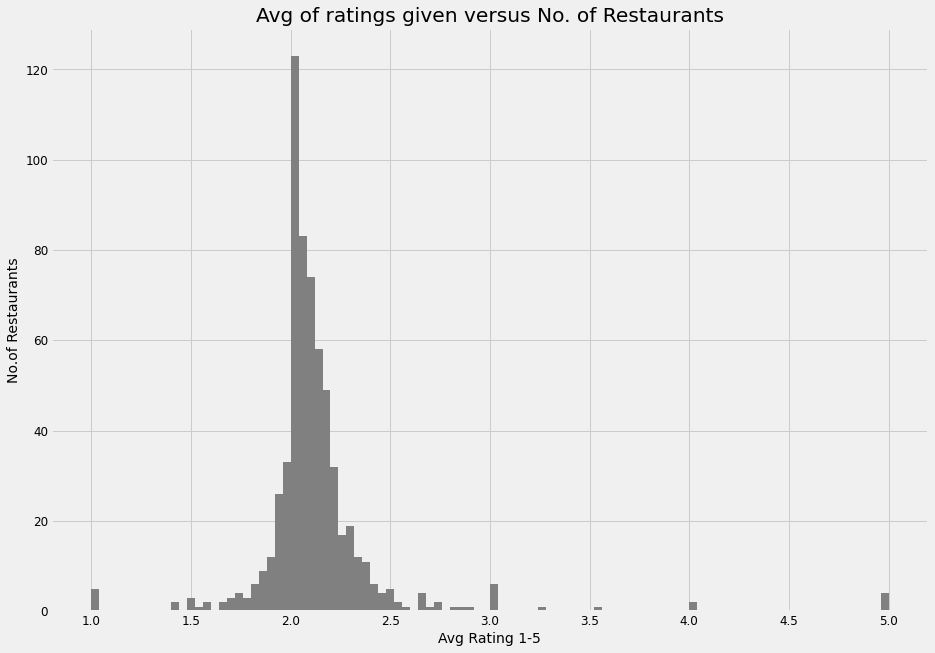

In [ ]:
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = "grey")
plt.title("Avg of ratings given versus No. of Restaurants")
plt.xlabel("Avg Rating 1-5")
plt.ylabel ("No.of Restaurants")

Text(0, 0.5, 'No.of Restaurants')

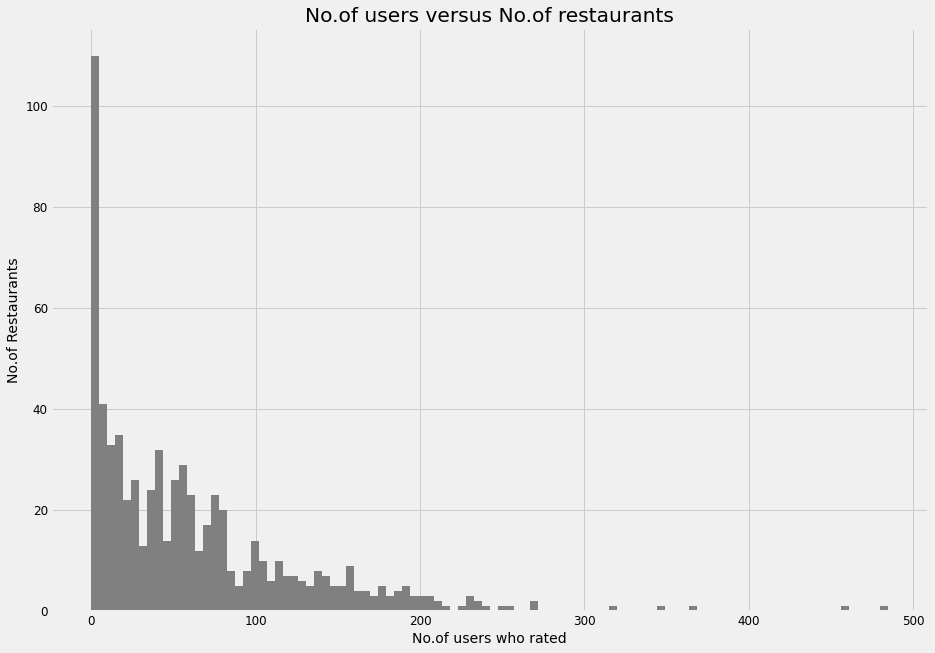

In [ ]:
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'grey')
plt.title("No.of users versus No.of restaurants")
plt.xlabel("No.of users who rated")
plt.ylabel ("No.of Restaurants")

A quick heatmap to show top 10 and bottom 10 restaurants, ordered by number of users who rated them. First we will create a dataframe to represent these 20 entries.

In [ ]:
ratings_mean_count_df.sort_values(by = ["count"], ascending= False, inplace = True)
df1= ratings_mean_count_df.iloc[0:9]
ratings_mean_count_df.sort_values(by = ["count"], ascending= True, inplace = True)
df2= ratings_mean_count_df.iloc[0:9]
smalldf =[df1,df2]
mergeddf= pd.concat(smalldf)
mergeddf

,count,mean
RestaurantName,,
Anna Maria Pasteria,485.0,1.977320
Spasso,457.0,1.892779
Dave's Italian Kitchen,364.0,2.016484
Dancing Noodles Cafe,347.0,2.011527
Scoozi!,318.0,1.704403
La Sorella di Francesca,270.0,2.081481
Leona's Original Pizza,267.0,1.928839
VINCI,255.0,2.164706
Stanley's Kitchen & Tap,251.0,2.000000


In [ ]:
sns.set_style('darkgrid')

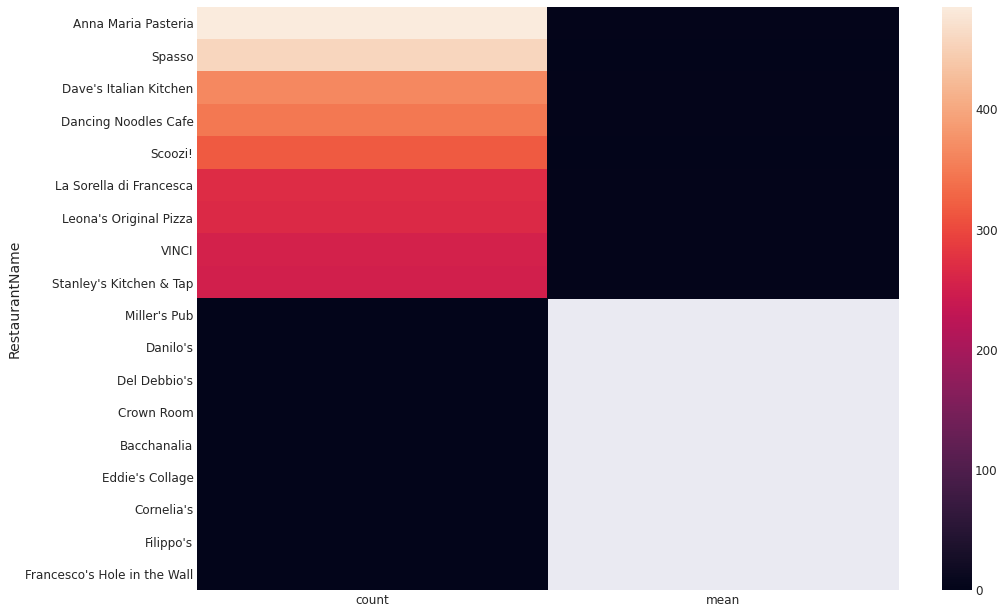

In [ ]:
sns.heatmap(mergeddf)

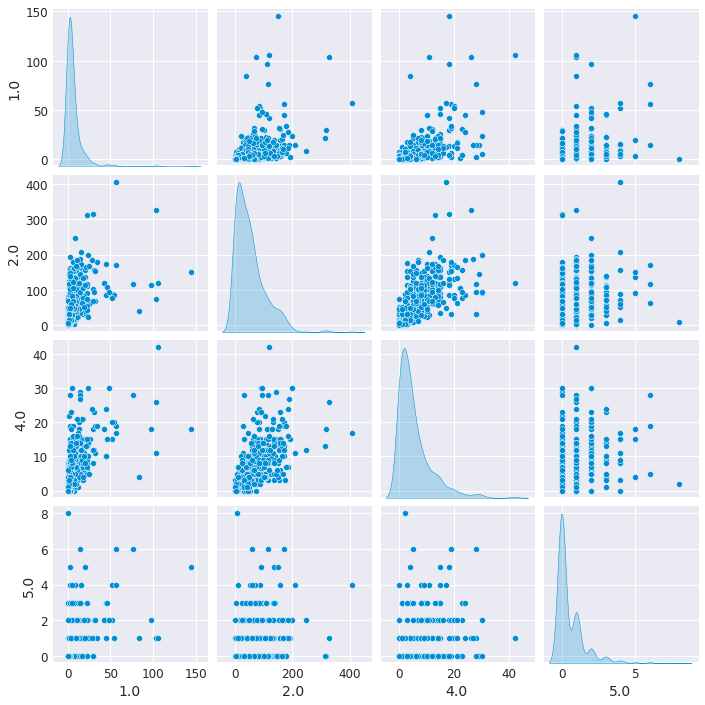

In [ ]:
sns.pairplot(DF1, diag_kind='kde')

Normalising the bigger Dataframe to further understand relationships

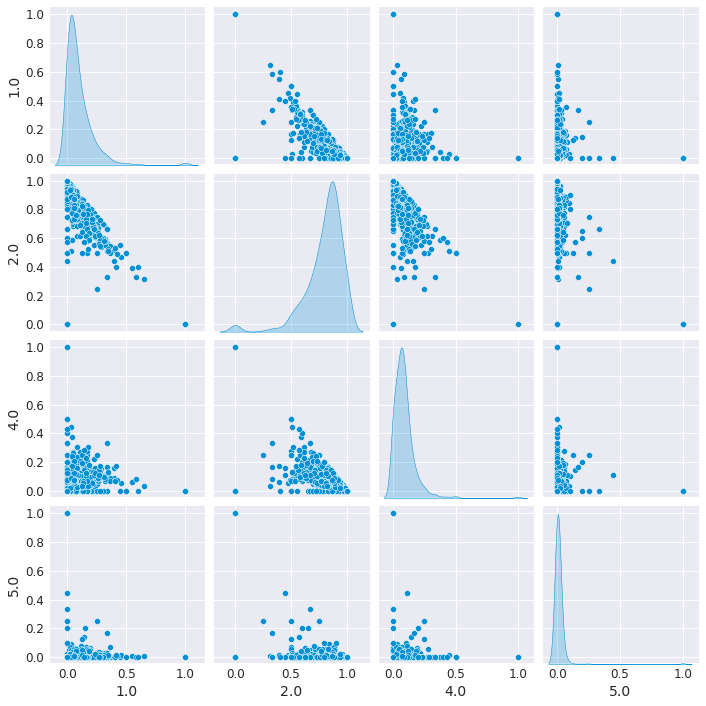

In [ ]:
DF2=pd.crosstab(Restaurant_Rating_df.restaurant, Restaurant_Rating_df.rating, normalize='index')
sns.pairplot(DF2, diag_kind='kde')

In [ ]:
ratings_mean_count_df[ratings_mean_count_df['mean'] > 0]

,count,mean
RestaurantName,,
Tien Tsin,1.0,2.000000
Monastero's,1.0,1.000000
Natraj,1.0,4.000000
Pappagallo's,1.0,2.000000
Itto Sushi,1.0,2.000000
...,...,...
Scoozi!,318.0,1.704403
Dancing Noodles Cafe,347.0,2.011527
Dave's Italian Kitchen,364.0,2.016484


### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(Restaurant_Rating_df, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(1699734, 7)
(728458, 7)


In [ ]:
# pivot ratings into restaurant features
user_data = X_train.pivot(index = 'UserID', columns = 'restaurant', values = 'rating').fillna(0)
user_data.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create a Copy of train and test dataset
These datasets will be used for prediction and evaluation.

Dummy train will be used later for prediction of the restaurants which have not been rated by the user. To ignore the restaurants rated by the user, we will mark it as 0 during prediction. The retaurants not rated by user is marked as 1 for prediction.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the restaurants rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# The restaurants not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'UserID', columns = 'restaurant', values = 'rating').fillna(1)

# The restaurantss not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='UserID', columns = 'restaurant', values = 'rating').fillna(0)

In [ ]:
dummy_train.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
37,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
42,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
dummy_test.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User-User Similarity matrix

#### Using Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.49613894 0.         0.        ]
 ...
 [0.         0.         0.49613894 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(3592, 3592)


###  Predicting the User ratings on the restaurants 

In [ ]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

NameError: ignored

In [ ]:
user_predicted_ratings.shape

(3592, 676)

We do not want to recommend the same restaurant that the user already rated. We are interested only in the restaurants not rated by the user, we will ignore the restaurants rated by the user.

This is where we will use our dummy train matrix that we previously built. 

In [ ]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.000000,0.247311,0.0,8.379114,4.935955,0.000000,0.714851,0.000000,0.780678,0.0,...,0.178174,0.000000,0.000000,0.0,9.722637,0.178174,0.000000,0.0,0.222911,0.000000
12,7.242160,0.070100,0.0,1.888345,0.000000,3.937416,1.401389,0.000000,0.241791,0.0,...,0.248788,0.000000,0.402015,0.0,1.672056,0.000000,0.000000,0.0,17.822483,0.301511
33,0.000000,0.316514,0.0,4.808139,2.424132,0.000000,4.226544,0.000000,1.390869,0.0,...,4.410478,0.000000,0.000000,0.0,5.991868,5.572503,0.570461,0.0,1.045661,0.000000
37,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.581822,0.000000,0.166246,0.0,...,0.000000,0.000000,0.000000,0.0,0.115663,0.000000,0.000000,0.0,3.655773,0.000000
42,0.223957,0.511408,0.0,2.384423,0.551994,1.586131,26.727476,0.579148,0.000000,0.0,...,0.000000,0.167248,0.721325,0.0,4.106243,0.000000,0.000000,0.0,1.478473,0.150756


### Top 5 restaurant recommendations for the User 42

In [ ]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

restaurant
00000216C    47.483369
00000518C    36.848374
00000166C    35.266614
00000543C    16.620762
00000378C    13.533079
Name: 624, dtype: float64

## Item-based collaborative filtering

In [ ]:
restaurant_features = X_train.pivot(index = 'restaurant', columns = 'UserID', values = 'rating').fillna(0)
restaurant_features.head()

UserID,11,12,33,37,42,55,62,65,97,109,...,50449,50515,50523,50525,50529,50562,50580,50616,50626,50669
restaurant,,,,,,,,,,,,,,,,,,,,,
000000C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
00000100C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000101C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000102C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000103C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Item-Item Similarity matrix

#### Using Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(restaurant_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.         0.54644912 ... 0.         0.01638517 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.54644912 0.         1.         ... 0.         0.00976924 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01638517 0.         0.00976924 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(676, 676)


### Predicting the User ratings on the restaurants

In [ ]:
item_predicted_ratings = np.dot(restaurant_features.T, item_similarity)
item_predicted_ratings

array([[0.        , 0.0303023 , 0.        , ..., 0.        , 0.01785412,
        0.        ],
       [0.61721616, 0.02161594, 0.        , ..., 0.        , 1.47315072,
        0.14124491],
       [0.        , 0.07134907, 0.        , ..., 0.        , 0.07666955,
        0.        ],
       ...,
       [0.00662301, 0.04789592, 0.        , ..., 0.        , 0.0722553 ,
        0.        ],
       [0.        , 0.08027469, 0.        , ..., 0.        , 0.20491724,
        0.        ],
       [0.03387012, 0.        , 0.0504855 , ..., 0.        , 0.15317391,
        0.19611614]])

(A.B)T = (B)T.(A)T

In [ ]:
item_predicted_ratings.shape

(3592, 676)

In [ ]:
dummy_train.shape

(3592, 676)

#### Filtering the ratings only for the restaurants not already rated by the user for recommendation

In [ ]:
# np.multiply for cell-by-cell multiplication 

item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.000000,0.030302,0.0,0.619101,0.425239,0.000000,0.047729,0.000000,0.061141,0.0,...,0.013776,0.000000,0.000000,0.0,0.710912,0.017113,0.000000,0.0,0.017854,0.000000
12,0.617216,0.021616,0.0,0.238516,0.000000,0.477850,0.108230,0.000000,0.030325,0.0,...,0.051678,0.000000,0.142033,0.0,0.187405,0.000000,0.000000,0.0,1.473151,0.141245
33,0.000000,0.071349,0.0,0.609716,0.452277,0.000000,0.580794,0.000000,0.169084,0.0,...,0.703101,0.000000,0.000000,0.0,0.730260,1.092084,0.094092,0.0,0.076670,0.000000
37,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.626817,0.000000,0.021424,0.0,...,0.000000,0.000000,0.000000,0.0,0.018928,0.000000,0.000000,0.0,0.314172,0.000000
42,0.013246,0.083282,0.0,0.240444,0.065308,0.212362,2.636500,0.046162,0.000000,0.0,...,0.000000,0.126618,0.213547,0.0,0.375233,0.000000,0.000000,0.0,0.105853,0.075647


### Top 5 restaurant recommendations for the User 42

In [ ]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

restaurant
00000216C    9.058584
00000518C    7.292841
00000166C    3.703445
00000543C    1.735147
00000555C    1.144380
Name: 624, dtype: float64

## Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the restaurant already rated by the User instead of predicting it for the restaurant not rated by the user.

### Using User-User similarity 

In [ ]:
test_user_features = X_test.pivot(index = 'UserID', columns = 'restaurant', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
- - - - - - - - - - 
(3592, 3592)


In [ ]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.20710678, 0.        , 0.        , ..., 0.        , 0.86019298,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Testing on the restaurants already rated by the user

In [ ]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
melted_ratings['rating'].describe()

count    41862.000000
mean         2.083799
std          0.701298
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (1, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X != 0] # only consider non-zero values as 0 means the user hasn't rated the restaurants

scaler = MinMaxScaler(feature_range = (1, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\lmali\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\lmali\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

12656

In [ ]:
test = X_test.pivot(index = 'UserID', columns = 'restaurant', values = 'rating')
test.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.3453420889337215


In [ ]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.1033580406629715


It means that on an average our User-based recommendation engine is making an error of 1.1 in predicting the User ratings. 

Now, let's evaluate Item-based recommendation engine.

### Using Item-Item Similarity 

In [ ]:
test_item_features = X_test.pivot(index = 'restaurant', columns = 'UserID', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.         0.31942555 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.31942555 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(676, 676)


In [ ]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10212858, 0.        , 0.        , ..., 0.        , 0.06055511,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Testing on the restaurants already rated by the user

In [ ]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
melted_ratings['rating'].describe()

count    41862.000000
mean         2.083799
std          0.701298
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (1, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X != 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (1, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\lmali\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\lmali\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

12656

In [ ]:
test = X_test.pivot(index = 'UserID', columns = 'restaurant', values = 'rating')
test.head()

restaurant,000000C,00000100C,00000101C,00000102C,00000103C,00000104C,00000105C,00000106C,00000107C,00000108C,...,0000091C,0000092C,0000093C,0000094C,0000095C,0000096C,0000097C,0000098C,0000099C,000009C
UserID,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

0.9477049570788354


In [ ]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

0.6956856528642212


It means that on an average our Item-based recommendation engine is making an error of 0.7 in predicting the User ratings. 


## Conclusion


For the given dataset, the Item-based collaborative filtering outperformed Item-based collaborative filtering.